In [98]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint, solve_ivp, solve_bvp
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from matplotlib.pyplot import savefig

In [12]:
def results():
    """Plot the actual population of ukraine since the beginning of the war versus our numerical method"""
    return_data = pd.read_csv('metadata-round-14-dtm-ukraine-returnees-dataset.csv')
    refugee_data = pd.read_csv('metadata-round-14-idp-estimation-25-september-2023.csv')
    useful = pd.read_csv('Ukraine Explorer Inputs Prod - RefugeesSeries.csv')
    return useful
    

In [38]:
useful = pd.read_csv('Ukraine Explorer Inputs Prod - RefugeesSeries.csv')
data = useful.iloc[1:,:]
data.RefugeesDate = pd.to_datetime(data.RefugeesDate)
data
data.groupby(df['Refugeesdate'].dt.strftime('%B'))['Revenue'].sum().sort_values()


/var/folders/9t/wltz5rw540dg7_k5xs930j_c0000gn/T/ipykernel_21816/2252610483.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.RefugeesDate = pd.to_datetime(data.RefugeesDate)
/var/folders/9t/wltz5rw540dg7_k5xs930j_c0000gn/T/ipykernel_21816/2252610483.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['NoRefugees'] = data['NoRefugees'].astype('int')


,RefugeesDate,NoRefugees
1,2022-04-25,85000
2,2022-04-27,128300
3,2022-05-03,165700
4,2022-05-09,180700
5,2022-05-18,180894
...,...,...
401,2023-11-05,5851604
402,2023-11-06,5851692
403,2023-11-07,5856217
404,2023-11-12,5855253


               RefugeesDate  NoRefugees  StartDate
TimeDifference                                    
0.000000         2022-04-25    0.998068 2022-04-25
0.065703         2022-04-27    0.997084 2022-04-25
0.262812         2022-05-03    0.996234 2022-04-25
0.459921         2022-05-09    0.995893 2022-04-25
0.755585         2022-05-18    0.995889 2022-04-25
...                     ...         ...        ...
18.363995        2023-11-05    0.867009 2022-04-25
18.396846        2023-11-06    0.867007 2022-04-25
18.429698        2023-11-07    0.866904 2022-04-25
18.593955        2023-11-12    0.866926 2022-04-25
18.692510        2023-11-15    0.866921 2022-04-25

[405 rows x 3 columns]


/var/folders/9t/wltz5rw540dg7_k5xs930j_c0000gn/T/ipykernel_21816/1325160672.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['StartDate'] = data['RefugeesDate'].iloc[0]
/var/folders/9t/wltz5rw540dg7_k5xs930j_c0000gn/T/ipykernel_21816/1325160672.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['StartDate'] = pd.to_datetime(data['StartDate'])
/var/folders/9t/wltz5rw540dg7_k5xs930j_c0000gn/T/ipykernel_21816/1325160672.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

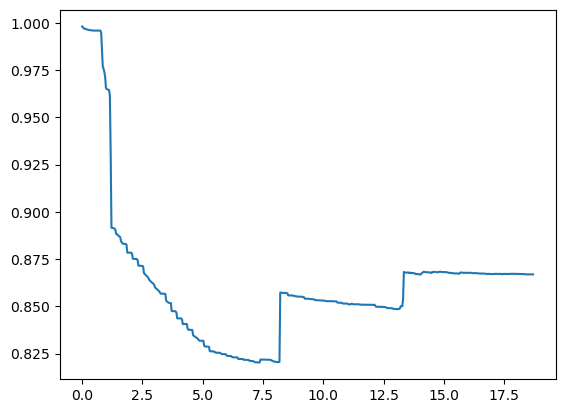

,RefugeesDate,NoRefugees,StartDate
TimeDifference,,,
0.000000,2022-04-25,0.998068,2022-04-25
0.065703,2022-04-27,0.997084,2022-04-25
0.262812,2022-05-03,0.996234,2022-04-25
0.459921,2022-05-09,0.995893,2022-04-25
0.755585,2022-05-18,0.995889,2022-04-25
...,...,...,...
18.363995,2023-11-05,0.867009,2022-04-25
18.396846,2023-11-06,0.867007,2022-04-25
18.429698,2023-11-07,0.866904,2022-04-25


In [88]:
useful = pd.read_csv('Ukraine Explorer Inputs Prod - RefugeesSeries.csv')
data = useful.iloc[1:,:]
data['StartDate'] = data['RefugeesDate'].iloc[0]
data['StartDate'] = pd.to_datetime(data['StartDate'])


data.RefugeesDate = pd.to_datetime(data.RefugeesDate).copy()
data['TimeDifference'] = (data['RefugeesDate'] - data['StartDate']).dt.days / 30.44
data.set_index(['TimeDifference'],inplace=True)
data['NoRefugees'] = data['NoRefugees'].astype('int').copy()
n = 44e6
data['NoRefugees'] = (n - data['NoRefugees'])/n



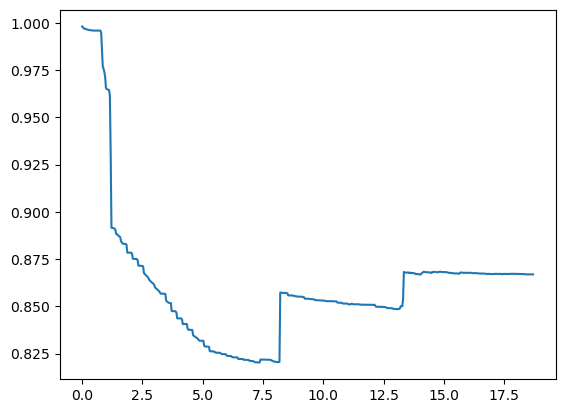

In [90]:
plt.plot(data.index, data.NoRefugees)
plt.show()

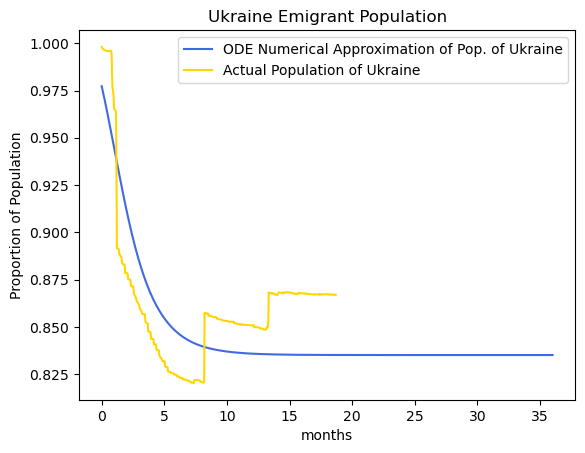

In [102]:
t0 = 0 
tf = 36
n = 44e6
beta=5
gamma=1/1.25
k = 34e6/n
c = 75e5/n
#define ode measuring the spread of disease
def ode(t,y): 
    if t <1:
        return np.array([beta*y[1]*y[0]*(1-y[0]/k),-beta*y[1]*y[0]*(1-y[0]/k)-gamma*y[1], gamma*y[1],0])
    else:
        return np.array([beta*y[1]*y[0]*(1-y[0]/k),-beta*y[1]*y[0]*(1-y[0]/k)-gamma*y[1], gamma*y[1] - c * y[2],c * y[2]])
#initial conditions
y0 = np.array([(n-1e6)/n,1e6/n,0, 0])
y0[3] = min(y0[3], 1 - y0[0])

#solve ivp and get solution
solution=solve_ivp(ode,(t0,tf), y0, t_eval=np.linspace(t0,tf,150))

#plots and labels
plt.plot(solution.t, solution.y[0],label="ODE Numerical Approximation of Pop. of Ukraine", color = 'royalblue')
# plt.plot(solution.t, solution.y[1],label="Leaving")
# plt.plot(solution.t, solution.y[2],'r',label="Out of Ukraine")
# plt.plot(solution.t, solution.y[3],'purple',label="Returned to Ukraine")
plt.plot(data.index, data.NoRefugees, label = 'Actual Population of Ukraine', color = 'gold')
plt.xlabel('months')
plt.title('Ukraine Emigrant Population')
plt.ylabel('Proportion of Population')
plt.legend()
plt.savefig('Ukraine_Data.pdf')
plt.show()